Enter the path to the image: /content/pens.jpg


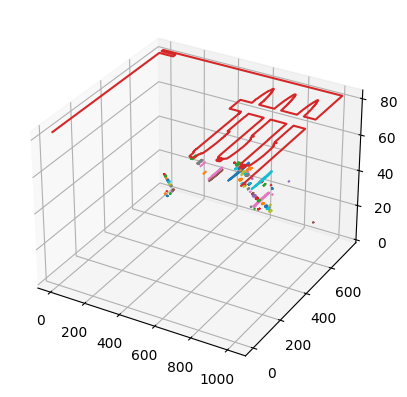

Estimated Weight: 771.072 units


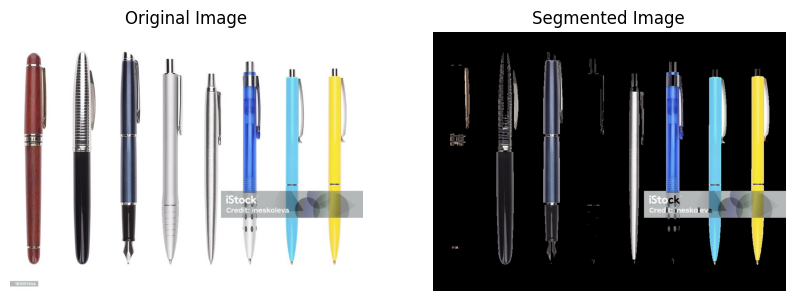

1/1 [==============================] - 1s 844ms/step
Predicted materials : ['screwdriver', 'ballpoint', 'chime']
Total number of objects: 51
Width: 1024 pixels, Height: 753 pixels
Identified Objects:
ballpoint
letter_opener
carpenter's_kit


In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions

material_model = MobileNetV2(weights='imagenet')

def create_3d_model(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY)

    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    for i, contour in enumerate(contours):
        xs = contour[:, 0, 0]
        ys = contour[:, 0, 1]
        zs = np.full_like(xs, i)

        ax.plot(xs, ys, zs)

    plt.show()

    return contours

def segment_3d_model(contours):
    segmented_model = max(contours, key=cv2.contourArea)
    return segmented_model

def find_dimensions(segmented_model):
    x, y, w, h = cv2.boundingRect(segmented_model)
    width = w
    height = h
    return width, height

def calculate_weight(dimensions):
    width, height = dimensions
    volume = width * height * 1
    weight = volume * 0.001
    return weight

def convert_to_3d_model(img):
    return img

def segment_image(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    mask = np.zeros_like(gray)

    rect = (50, 50, img.shape[1] - 50, img.shape[0] - 50)

    cv2.grabCut(img, mask, rect, None, None, 5, cv2.GC_INIT_WITH_RECT)

    mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

    segmented_img = img * mask2[:, :, np.newaxis]

    return segmented_img

def calculate_dimensions(segmented_img):
    height, width, _ = segmented_img.shape
    return width, height

def count_objects(mask):
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    num_objects = len(contours)

    return num_objects

def predict_materials(img):

    img_resized = cv2.resize(img, (224, 224))
    img_array = preprocess_input(np.expand_dims(img_resized, axis=0))

    predictions = material_model.predict(img_array)

    decoded_predictions = decode_predictions(predictions, top=3)[0]
    material_labels = [label for (_, label, _) in decoded_predictions]

    return material_labels

if __name__ == "__main__":
    image_path = input("Enter the path to the image: ")

    img = cv2.imread(image_path)

    contours = create_3d_model(img)

    segmented_model = segment_3d_model(contours)

    dimensions = find_dimensions(segmented_model)
    weight = calculate_weight(dimensions)

    print(f"Estimated Weight: {weight} units")

    three_d_model = convert_to_3d_model(img)
    segmented_img = segment_image(img)

    width, height = calculate_dimensions(segmented_img)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(segmented_img, cv2.COLOR_BGR2RGB))
    plt.title("Segmented Image")
    plt.axis('off')

    plt.show()





    object_labels = predict_materials(img)
    print(f"Predicted materials : {predicted_materials}")
    print(f"Total number of objects: {num_objects}")

    print(f"Width: {width} pixels, Height: {height} pixels")
    print("Identified Objects:")
    for label in object_labels:
        print(label)
